In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the flights data
flights = pd.read_csv('data/flights.csv')

In [18]:
flights.head(10)

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0
5,2013,7,28,7,UA,12478,John F. Kennedy International,New York,NY,14771,San Francisco International,San Francisco,CA,1710,87,1.0,2035,183,1,0
6,2013,10,6,7,WN,13796,Metropolitan Oakland International,Oakland,CA,12191,William P Hobby,Houston,TX,630,-1,0.0,1210,-3,0,0
7,2013,7,28,7,EV,12264,Washington Dulles International,Washington,DC,14524,Richmond International,Richmond,VA,2218,4,0.0,2301,15,1,0
8,2013,10,8,2,AA,13930,Chicago O'Hare International,Chicago,IL,11298,Dallas/Fort Worth International,Dallas/Fort Worth,TX,1010,8,0.0,1240,-10,0,0
9,2013,5,12,7,UA,12478,John F. Kennedy International,New York,NY,12892,Los Angeles International,Los Angeles,CA,1759,40,1.0,2107,10,0,0


<Figure size 1200x600 with 0 Axes>

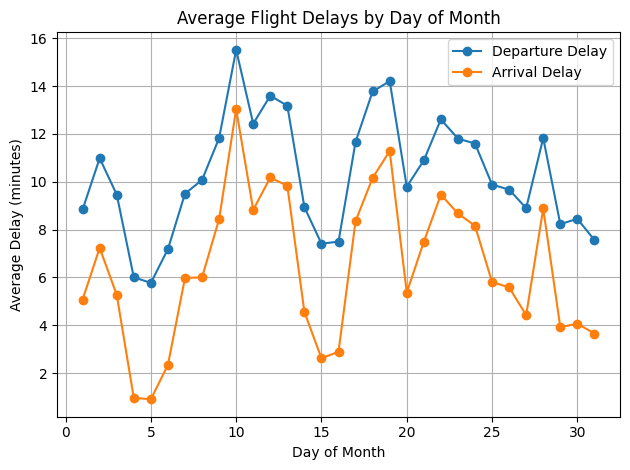

In [19]:
# Calculate average delay by day
daily_delays = flights.groupby('DayofMonth')[['DepDelay', 'ArrDelay']].mean()

# Create the plot
plt.figure(figsize=(12, 6))
daily_delays.plot(marker='o')
plt.title('Average Flight Delays by Day of Month')
plt.xlabel('Day of Month')
plt.ylabel('Average Delay (minutes)')
plt.grid(True)
plt.legend(['Departure Delay', 'Arrival Delay'])
plt.tight_layout()
plt.show()

# Save the plot to a file
#plt.savefig('images/delays_by_day.png')

In [20]:
# These are the columns in flights.csv: Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled



In [21]:
# Drop rows where important columns have null/invalid values
flights = flights.dropna(subset=[
  'Year', 'Month', 'DayofMonth',  # date columns
  'OriginAirportID', 'OriginAirportName', 'DestAirportID', 'DestAirportName',  # airport columns
  'DepDelay', 'ArrDelay'  # delay columns
])

# Reset index after dropping rows
flights.reset_index(drop=True, inplace=True)

# Show the number of dropped rows
print(f"Number of rows dropped: {flights.shape[0] - len(flights)}")

Number of rows dropped: 0


In [22]:
print(flights.shape)
flights = flights.dropna()
print(flights.shape)

(271940, 20)
(269179, 20)


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Create target variable (1 if delayed, 0 if not)
flights['Delayed'] = (flights['DepDelay'] > 15).astype(int)

# Prepare features
X = flights[['DayOfWeek', 'DestAirportID']] 
y = flights['Delayed']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions and print performance metrics
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

# Get feature importance
feature_importance = pd.DataFrame({
  'feature': ['DayOfWeek', 'DestAirportID'],
  'importance': clf.feature_importances_
})
print("\nFeature Importance:")
print(feature_importance.sort_values('importance', ascending=False))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89     43384
           1       0.00      0.00      0.00     10452

    accuracy                           0.81     53836
   macro avg       0.40      0.50      0.45     53836
weighted avg       0.65      0.81      0.72     53836


Feature Importance:
         feature  importance
1  DestAirportID     0.74387
0      DayOfWeek     0.25613


/Users/barissencan/.pyenv/versions/3.11.9/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/barissencan/.pyenv/versions/3.11.9/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/barissencan/.pyenv/versions/3.11.9/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Calculate Random Forest accuracy
rf_accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")

# Create and train Logistic Regression model
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train)

# Make predictions with Logistic Regression
lr_predictions = lr_model.predict(X_test)

# Calculate Logistic Regression accuracy
lr_accuracy = accuracy_score(y_test, lr_predictions)
print(f"Logistic Regression Accuracy: {lr_accuracy:.4f}")

# Compare feature importance for Logistic Regression
lr_importance = pd.DataFrame({
  'feature': ['DayOfWeek', 'DestAirportID'],
  'importance': abs(lr_model.coef_[0])
})
print("\nLogistic Regression Feature Importance:")
print(lr_importance.sort_values('importance', ascending=False))

Random Forest Accuracy: 0.8059
Logistic Regression Accuracy: 0.8059

Logistic Regression Feature Importance:
         feature  importance
0      DayOfWeek    0.008414
1  DestAirportID    0.000025
